In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

osrm_data_sp = pd.read_csv("python_osrm_speed")
aug_data = pd.read_csv('python_aug.csv')
segments = pd.read_csv('C:/Users/Korhan/Desktop/GitHub/GPS_transport/input_data/python/segments.csv')
markers = pd.read_csv('C:/Users/Korhan/Desktop/GitHub/GPS_transport/input_data/python/markers.csv')

aug_data = aug_data.rename({"aug_time": "time"}, axis="columns")
osrm_data_sp = osrm_data_sp.rename({"assos_dir": "dir", "assos_segment_id": "segment_id", "raw_time": "time"}
                                   , axis="columns")

b = np.equal(aug_data["segment_id"].to_numpy()[:, None], segments["segment_id"].to_numpy()).nonzero()

aug_data.loc[aug_data.index[b[0]], "distance_from_start"] = segments.loc[segments.index[b[1]], "distance_from_start"].to_numpy()

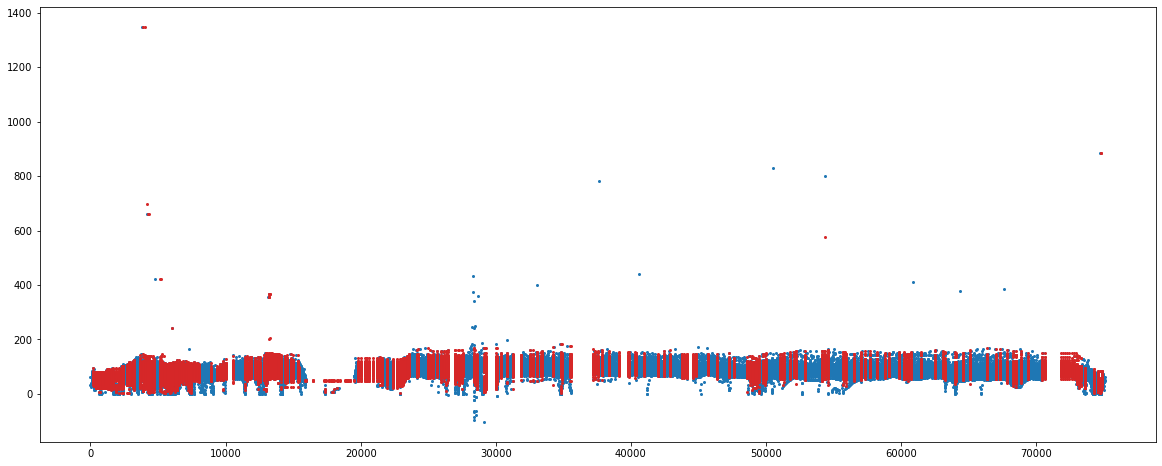

In [24]:
%matplotlib inline
dir_chosen = 1

fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot(1, 1, 1)

ax1.plot(osrm_data_sp[osrm_data_sp["dir"] == dir_chosen]["distance_from_start"],
            osrm_data_sp[osrm_data_sp["dir"] == dir_chosen]["speed"],
        'o', markersize=2, c="tab:blue")

ax1.plot(aug_data[aug_data["dir"] == dir_chosen]["distance_from_start"],
            aug_data[aug_data["dir"] == dir_chosen]["speed"],
        'o', markersize=2, c="tab:red")

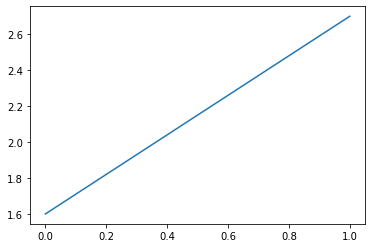

In [25]:
plt.ion()
plt.plot([1.6, 2.7])